In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt




# data = pd.read_csv('./StockData/TrainingData/stock0050TrainingData.csv')


x_train = np.load('./StockData/TrainingData/NormtrainingX_stock0050.npy')
y_train = np.load('./StockData/TrainingData/trainingY_stock0050.npy')

x_train = np.where(np.isnan(x_train), 0, x_train)
y_train = np.where(np.isnan(y_train), 0, y_train)
x_train =x_train.reshape(-1,5,x_train.shape[1])
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.33,random_state=42)

print(x_train.shape)
print(y_train.shape)
'''x_train = []
print(data)
for i in data:
    x_train.append(i)
y_train = data.iloc[0].to_list()
x_train = np.array(x_train)
y_train = np.array(y_train)
'''
#print(x_train[1])

#print(y_train)


model = Sequential()
print(x_train.shape[2])
model.add(LSTM(10,input_shape=(5,x_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(10,return_sequences =False))
model.add(Dropout(0.2))
#model.add(LSTM(10,return_sequences = True))
#model.add(Dropout(0.2))
#model.add(LSTM(10))
#model.add(Dropout(0.2))
model.add(Dense(1))

sgd = optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mse",optimizer=sgd)

model.summary()

callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
tbCallBack = TensorBoard(log_dir='./logs',  # log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
#                  batch_size=32,     # 用多大量的数据计算直方图
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
model.fit(x_train,y_train, epochs=1000, batch_size=20, callbacks=[callback,tbCallBack],validation_data=(x_train,y_train),validation_split=0.2)


(449, 5, 3)
(449,)
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 5, 10)             560       
_________________________________________________________________
dropout_23 (Dropout)         (None, 5, 10)             0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
Train on 449 samples, validate on 449 samples
Epoch 1/1000
449/449 [==============================] - 1s 3ms/step - los

In [17]:
model.predict(x_test)
#print(y_test)

array([[-5.59664905e-01],
       [ 5.03754497e-01],
       [-6.30003333e-01],
       [-3.05943750e-03],
       [-9.32177603e-02],
       [ 1.23546696e+00],
       [-1.11623645e+00],
       [-4.11612415e+00],
       [-7.93909907e-01],
       [-5.60128391e-01],
       [-2.38906503e-01],
       [ 6.83021128e-01],
       [-2.35743254e-01],
       [ 2.50152898e+00],
       [ 3.86948586e+00],
       [-2.77579218e-01],
       [ 4.12154585e-01],
       [ 5.19633964e-02],
       [ 2.42582113e-01],
       [ 7.31726110e-01],
       [-1.09439999e-01],
       [-1.05932981e-01],
       [-1.09464514e+00],
       [ 5.04234195e-01],
       [-2.08560854e-01],
       [-5.90382889e-03],
       [ 1.05750179e+00],
       [-8.66465941e-02],
       [-2.19054624e-01],
       [ 8.13880742e-01],
       [-2.87504554e-01],
       [-1.22926861e-01],
       [-1.77029416e-01],
       [-1.11952662e-01],
       [ 7.40338624e-01],
       [-2.88466740e+00],
       [ 6.51337385e-01],
       [ 3.37089837e-01],
       [-2.0

In [8]:
print(y_test)


[-0.94  1.75 -1.8   1.6   0.77  0.14 -0.85 -4.67 -0.85 -0.45 -0.41  0.75
  0.    1.74  1.22 -0.57  0.93  0.35  0.3   2.   -0.55  0.6  -1.63  1.4
  0.65  0.    1.55  0.1   0.35  1.65 -0.15 -0.2   2.4   0.    0.85 -3.5
  1.25  0.25 -3.3   0.25 -0.2   1.8  -1.95  1.1   1.85 -0.05 -2.95 -0.75
  0.39  1.3   0.35 -0.19  1.57  2.05  0.22  1.75 -0.05 -1.15 -0.35  1.2
 -0.75  1.05  1.7  -2.75 -0.85  2.   -0.8   1.    1.45  0.35  0.45  0.02
 -0.2  -0.6  -0.66 -0.48 -0.5  -1.4   2.2  -0.3  -1.2   2.15  1.1  -0.64
  0.9  -0.94  2.    0.5   0.58  1.5   2.    0.21 -3.45 -0.1  -1.82 -0.65
  0.    2.05 -0.2  -1.7  -0.35 -0.1   0.2   1.9  -0.2  -0.5   0.8   1.25
  0.4   1.35  0.45 -2.04  1.45  2.55  0.5  -0.3   0.36  0.95 -0.03 -0.72
  1.2  -5.41  1.1   3.5   1.65  2.62  0.49 -0.24 -1.4   2.5  -1.95  1.15
  0.37 -0.48 -0.04  1.2   2.1   0.02  0.5   0.4  -0.03 -0.95 -1.2   0.64
  0.15 -0.4   0.5   0.65 -1.05  2.4  -1.45  1.45 -0.1   1.68  0.85  2.8
  0.75  1.95  0.3   0.1   0.71  1.65 -0.1  -1.9   0.75 

In [9]:

x_train.shape

(449, 5, 2)

In [10]:
x_test.shape


(222, 5, 2)

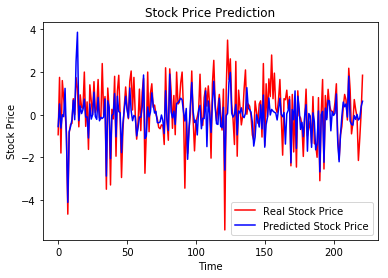

In [18]:
predicted_stock_price = model.predict(x_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()